## Exploratory data analysis of the Airbnb data of the island of Santorini

Questions to be answered:
* Descriptive statistics for:
   * the number of accommodates
   * the prices
   * the number of bedrooms
   * the number of beds
   * the number of bathrooms
   * the room type
   * the amenities
* Correlations
* Association rule mining:
    * Top-10 combinations of amenities
* Map of listings
* Similarity of listings:
    * a model for generating embeddings of listings
* Price prediction:
    * a baseline model
    * a more sophisticated model
* Results

In [130]:
import pandas as pd
import seaborn as sns

In [2]:
# Read data and keep only the listings of Santorini.
df = pd.read_csv('data/listings.csv')
df = df[df.neighbourhood_cleansed == 'Θήρας (Santorini)']

In [3]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
selected_columns = ['id', 'listing_url', 'name', 'description',
    'neighborhood_overview', 'host_id', 'host_since', 'host_location',
    'host_about', 'host_is_superhost', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed',
    'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text',
    'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating',
    'reviews_per_month', 'availability_365', 'last_review'];
df = df[selected_columns]

In [97]:
df.price = df.price.apply(lambda value: float(value[1:].replace(',', '')))

**Number of listings in Santorini, as of September 16, 2022**

In [5]:
len(df)

4973

## Descriptive statistics

### Number of accommodates statistics

In [6]:
df.accommodates.value_counts().sort_values(ascending=False)

2     1643
4     1132
3      924
6      433
5      414
8      119
7      113
10      73
16      28
9       27
12      22
14      16
1       12
11       9
13       7
15       1
Name: accommodates, dtype: int64

In [7]:
df.accommodates.describe()

count    4973.000000
mean        3.845365
std         2.198153
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        16.000000
Name: accommodates, dtype: float64

Text(0.5, 0, 'Number of accommodates')

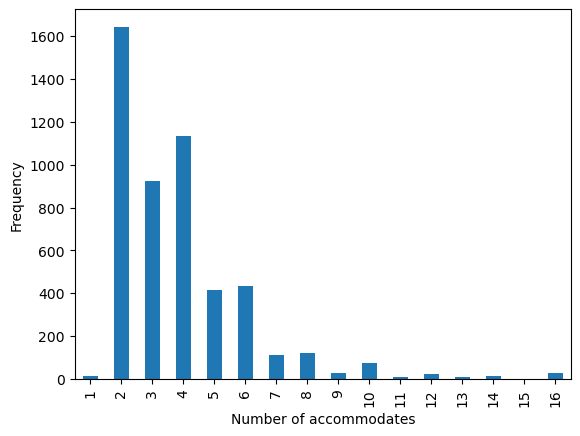

In [64]:
ax = df.accommodates.value_counts().sort_index().plot.bar()
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of accommodates')

### Number of bedrooms statistics

In [65]:
df.bedrooms.value_counts().sort_values(ascending=False)

1.0     3083
2.0     1098
3.0      357
4.0       98
5.0       53
6.0       21
7.0        6
8.0        5
9.0        4
17.0       2
23.0       1
10.0       1
11.0       1
Name: bedrooms, dtype: int64

In [66]:
df.bedrooms.describe()

count    4730.000000
mean        1.549471
std         1.053338
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        23.000000
Name: bedrooms, dtype: float64

Text(0.5, 0, 'Number of bedrooms')

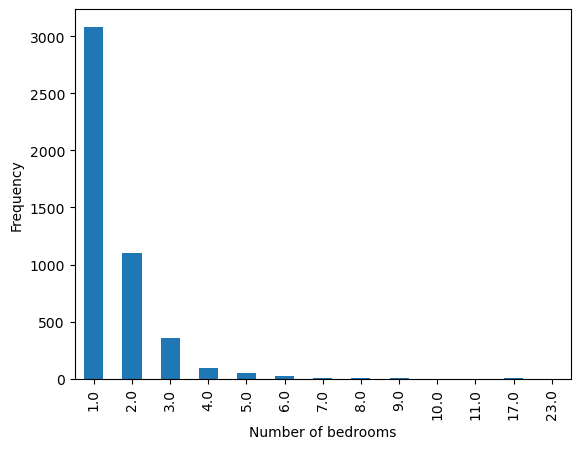

In [69]:
ax = df.bedrooms.value_counts().sort_index().plot.bar()
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of bedrooms')

### Number of beds statistics

In [70]:
df.beds.value_counts().sort_values(ascending=False)

1.0     1850
2.0     1411
3.0      882
4.0      410
5.0      163
6.0       88
8.0       30
7.0       29
10.0      11
11.0       5
12.0       3
9.0        3
17.0       2
15.0       1
20.0       1
43.0       1
13.0       1
21.0       1
Name: beds, dtype: int64

In [71]:
df.beds.describe()

count    4892.000000
mean        2.272690
std         1.652135
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        43.000000
Name: beds, dtype: float64

Text(0.5, 0, 'Number of beds')

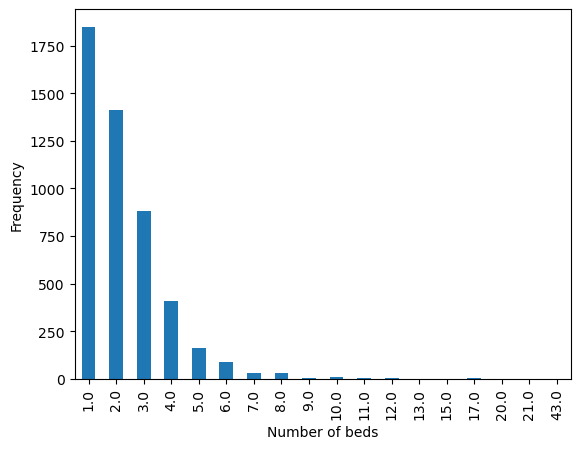

In [72]:
ax = df.beds.value_counts().sort_index().plot.bar()
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of beds')

### Number of bathrooms statistics

In [78]:
df.bathrooms_text.value_counts().sort_values(ascending=False)

1 bath              2474
1 private bath       992
2 baths              708
1.5 baths            290
3 baths              194
4 baths               58
1 shared bath         56
2.5 baths             40
5 baths               28
3.5 baths             23
6 baths               18
1.5 shared baths      15
5.5 baths              8
8 baths                7
2 shared baths         6
4.5 baths              6
7 baths                5
6.5 baths              2
3 shared baths         1
9 baths                1
16 baths               1
0 baths                1
10 baths               1
13.5 baths             1
Shared half-bath       1
0 shared baths         1
7.5 baths              1
7 shared baths         1
23 baths               1
4.5 shared baths       1
Name: bathrooms_text, dtype: int64

Text(0.5, 0, 'Number of bathrooms')

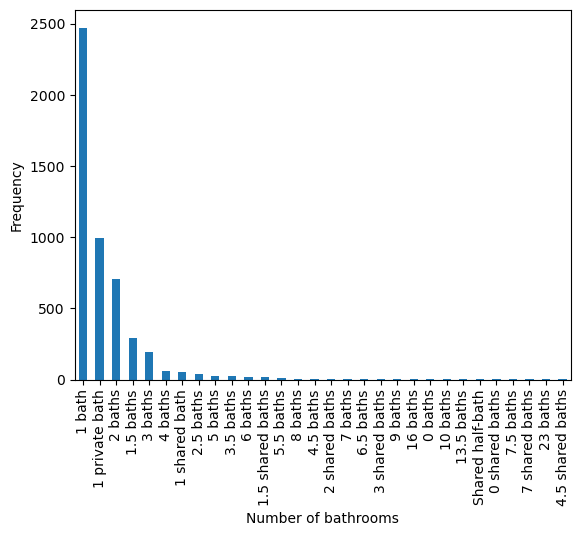

In [81]:
ax = df.bathrooms_text.value_counts().plot.bar()
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of bathrooms')

### Room type statistics

In [83]:
df.room_type.value_counts().sort_values(ascending=False)

Entire home/apt    3413
Private room       1252
Hotel room          306
Shared room           2
Name: room_type, dtype: int64

Text(0.5, 0, 'Room type')

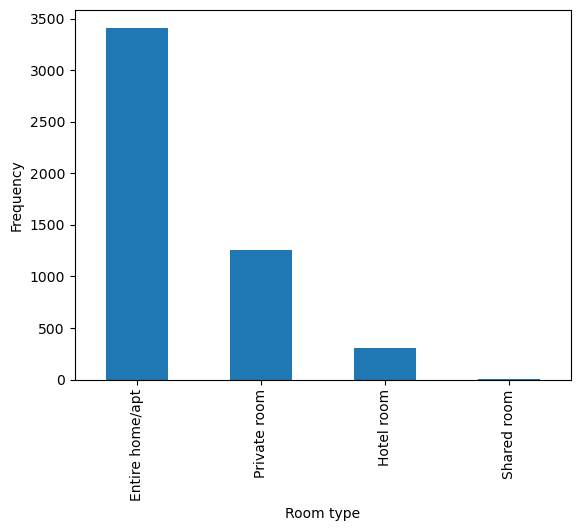

In [84]:
ax = df.room_type.value_counts().plot.bar()
ax.set_ylabel('Frequency')
ax.set_xlabel('Room type')

**Let's make the room type an ordinal variable**

In [126]:
ordinal_to_number = {
    'Shared room': 0,
    'Private room': 1,
    'Hotel room': 2,
    'Entire home/apt': 3
}

df['room_type_ordinal'] = df.room_type.apply(lambda value: ordinal_to_number[value])

### Price statistics

In [100]:
df.price.describe()

count     4973.000000
mean       405.025739
std        715.319607
min         15.000000
25%        132.000000
50%        227.000000
75%        426.000000
max      14063.000000
Name: price, dtype: float64

Text(0.5, 0, 'Price')

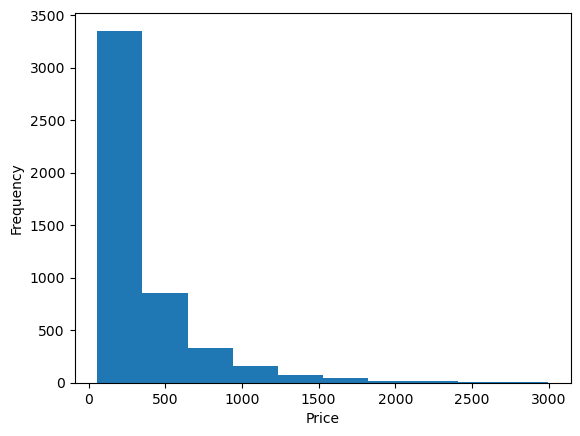

In [121]:
q_low = df.price.quantile(0.01)
q_high = df.price.quantile(0.99)
ax = df[(df.price > q_low) & (df.price < q_high)].price.plot.hist()
ax.set_xlabel('Price')

## Correlations

<AxesSubplot:>

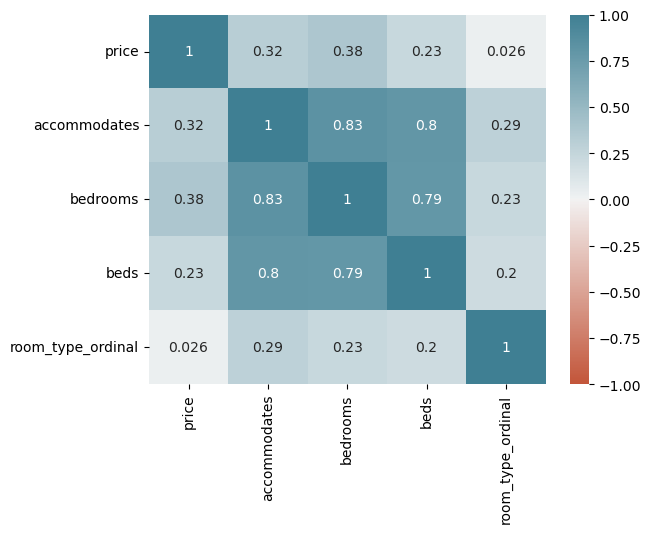

In [140]:
correlations = df[['price', 'accommodates', 'bedrooms', 'beds', 'room_type_ordinal']].corr()
sns.heatmap(correlations, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

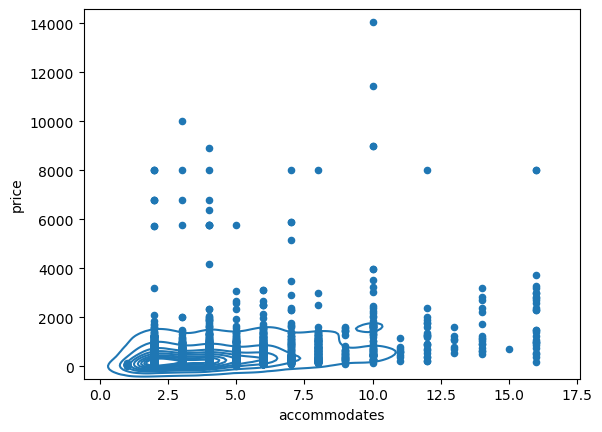

In [168]:
ax = df.plot.scatter(x='accommodates', y='price')
ax = sns.kdeplot(data=df, x='accommodates', y='price', ax=ax)

<AxesSubplot:title={'center':'price'}, xlabel='accommodates'>

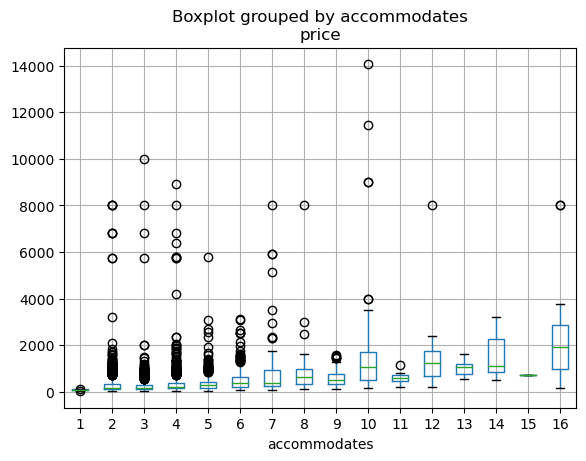

In [174]:
df.boxplot(by='accommodates', column='price')

<AxesSubplot:xlabel='accommodates', ylabel='price'>

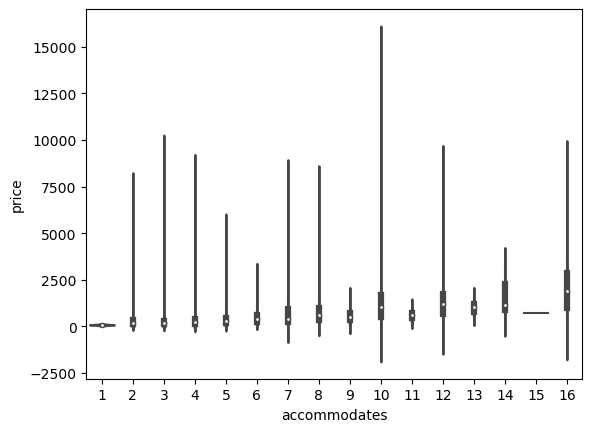

In [177]:
sns.violinplot(data=df, x='accommodates', y='price')